In [1]:
from ndiff import ppm_routines
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import set_neutral_position
import pandas as pd
from imp import reload
jtplot.style()
%matplotlib inline


In [2]:
def ppm_reconstruction(h, Slayer):    
    Sinterface = np.zeros(np.size(Slayer)+1, dtype=np.float32)
    ppm_routines.interface_scalar(h, Slayer, Sinterface, 2)
    Sl = np.zeros(np.size(Slayer), dtype=np.float32)
    Sr = np.zeros(np.size(Slayer), dtype=np.float32)
    ppm_routines.ppm_left_right_edge_values(Slayer.astype(np.float32), Sinterface, Sl, Sr)
    return Sl, Sr

In [12]:
# Set up some examples based on Alistair's schematics of the neutral diffusion
# Identical columns
hl = np.array([10.,10.,10.,10.])
hr = np.array([10.,10.,10.,10.])
zil = np.array(0) ; zil = np.append(zil,hl.cumsum())
zir = np.array(0) ; zir = np.append(zir,hr.cumsum())
Tr = np.array([20.,16.,12.,10.])
Tl = np.array([18.,14.,10.,8.])

Tl_t, Tl_b = ppm_reconstruction(hl, Tl)
zl_t = hl.cumsum() - hl[0]
zl_b = hl.cumsum()
zl_c = hl.cumsum() - hl/2.

Tr_t, Tr_b = ppm_reconstruction(hr, Tr)
zr_t = hr.cumsum() - hr[0]
zr_b = hr.cumsum()
zr_c = hr.cumsum() - hr/2.

/local/home/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


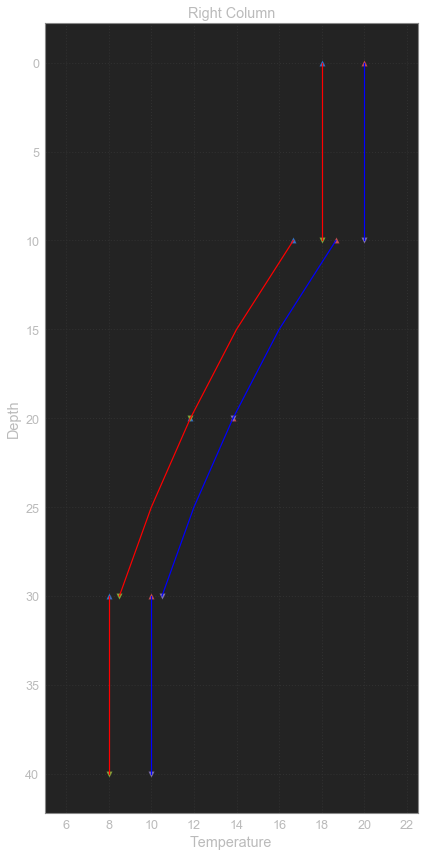

In [16]:
plt.figure(figsize=(6,12))
#plt.subplot(1,2,1)
for k in np.arange(0,hl.size):
    z = np.array( [zl_t[k], zl_c[k], zl_b[k]])
    T = np.array( [Tl_t[k], Tl[k], Tl_b[k]] )
    plt.plot(T,z, color='red')
plt.scatter(Tl_t, zl_t, marker='^')
plt.scatter(Tl_b, zl_b, marker='v')
plt.grid(ls='dotted')
plt.xlabel('Temperature')
plt.ylabel('Depth')
plt.title('Left Column')
plt.xlim( (5,22.5) )

#plt.subplot(1,2,2)
for k in np.arange(0,hl.size):
    z = np.array( [zr_t[k], zr_c[k], zr_b[k]] )
    T = np.array( [Tr_t[k], Tr[k], Tr_b[k]] )
    plt.plot(T,z, color = 'blue')
plt.scatter(Tr_t, zr_t, marker='^')
plt.scatter(Tr_b, zr_b, marker='v')    
plt.grid(ls='dotted')
plt.xlabel('Temperature')
plt.title('Right Column')
plt.xlim( (5,22.5) )
plt.gca().invert_yaxis()
plt.savefig('warmer_left.eps',format='eps')
plt.show()

In [19]:
Sl_t = np.zeros(hl.size) ; Sl_b = np.zeros(hl.size)
Sr_t = np.zeros(hl.size) ; Sr_b = np.zeros(hl.size)
drdt_lt = -1*np.ones(hl.size) ; drdt_lb = -1*np.ones(hl.size)
drds_lt = np.zeros(hl.size) ; drds_lb = np.zeros(hl.size)
drdt_rt = -1*np.ones(hl.size) ; drdt_rb = -1*np.ones(hl.size)
drds_rt = np.zeros(hl.size) ; drds_rb = np.zeros(hl.size)
# Pl = np.zeros(2*hl.size, dtype=np.float32) ; Pr = np.zeros(2*hl.size, dtype=np.float32)
# Sl = np.zeros(2*hl.size, dtype=np.float32) ; Sr = np.zeros(2*hl.size, dtype=np.float32)
# Tl = np.zeros(2*hl.size, dtype=np.float32) ; Tr = np.zeros(2*hl.size, dtype=np.float32)

reload(set_neutral_position)
PoL, PoR, PoL_abs, PoR_abs, KoL, KoR, hEff, hL, hR = set_neutral_position.set_neutral_surface_position(
    zil, Tl_t, Tl_b, Sl_t, Sl_b, drdt_lt, drdt_lb, drds_lt, drds_lb,
    zir, Tr_t, Tr_b, Sr_t, Sr_b, drdt_rt, drdt_rb, drds_rt, drds_rb)

     Pl   Sl         Tl  dRdS_l  dRdT_l
0   0.0  0.0  18.000000     0.0    -1.0
1  10.0  0.0  18.000000     0.0    -1.0
2  10.0  0.0  16.666666     0.0    -1.0
3  20.0  0.0  11.833333     0.0    -1.0
4  20.0  0.0  11.833333     0.0    -1.0
5  30.0  0.0   8.500000     0.0    -1.0
6  30.0  0.0   8.000000     0.0    -1.0
7  40.0  0.0   8.000000     0.0    -1.0
     Pr   Sr         Tr  dRdS_r  dRdT_r
0   0.0  0.0  20.000000     0.0    -1.0
1  10.0  0.0  20.000000     0.0    -1.0
2  10.0  0.0  18.666666     0.0    -1.0
3  20.0  0.0  13.833333     0.0    -1.0
4  20.0  0.0  13.833333     0.0    -1.0
5  30.0  0.0  10.500000     0.0    -1.0
6  30.0  0.0  10.000000     0.0    -1.0
7  40.0  0.0  10.000000     0.0    -1.0

Working on k_surface 0: dRho: -2.000000 Tl[0]: 18.000000 Tr[0]: 20.000000
Searching left: dRhoTop: 2.000000 dRhoBot: 2.000000
klm1: 0 kl: 0 kr: 0
Position on left : 0.000000
Position on right: 0.000000

Working on k_surface 1: dRho: -2.000000 Tl[0]: 18.000000 Tr[1]: 20.000000
Se

In [20]:
df = pd.DataFrame({'PoL': PoL, 'PoR': PoR, 'zl': PoL_abs, 'zr': PoR_abs, 'KoL': (KoL+1), 'KoR': (KoR+1), 'hL': hL, 'hR': hR})
print(df)
print(hEff)

    KoL  KoR       PoL       PoR         hL         hR         zl         zr
0     1    1  0.000000  0.000000   0.000000   0.000000   0.000000   0.000000
1     1    1  1.000000  1.000000  10.000000  10.000000  10.000000  10.000000
2     1    2  1.000000  0.000000   0.000000   0.000000  10.000000  10.000000
3     1    2  0.000000  0.137931 -10.000000   1.379309   0.000000  11.379309
4     1    2  1.000000  0.137931  10.000000   0.000000  10.000000  11.379309
5     2    2  0.000000  0.413793   0.000000   2.758622  10.000000  14.137931
6     2    2  0.586207  1.000000   5.862069   5.862069  15.862069  20.000000
7     2    3  0.586207  0.000000   0.000000   0.000000  15.862069  20.000000
8     2    3  1.000000  0.600000   4.137931   6.000001  20.000000  26.000001
9     3    3  0.000000  0.600000   0.000000   0.000000  20.000000  26.000001
10    3    3  0.400000  1.000000   3.999999   3.999999  23.999999  30.000000
11    3    4  0.550000  0.000000   1.500000   0.000000  25.500000  30.000000

In [21]:
hEff.sum()

24.760027686142539